# Presentation du dataset

Notre dataset porte sur les jeux vidéo et plus précisément sur le nombre de vente en europe d'un jeu vidéo en fonction de son genre, de son éditeur, de sa platforme et de son année de parution.

Importation du dataset

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("train_data.csv")

Nettoyage du dataset

In [44]:
df.drop('na_sales', axis=1, inplace=True)
df.drop('jp_sales', axis=1, inplace=True)
df.drop('other_sales', axis=1, inplace=True)
df.drop('global_sales', axis=1, inplace=True)

df.drop('rank', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

df = df.dropna()

db = df['year'].fillna(0).astype(int).astype(str).replace('0', '')

df.loc[:, 'year'] = db








<ipython-input-44-2a9a820487f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'year'] = db


Aperçu du dataset

In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13029 entries, 0 to 13277
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   platform   13029 non-null  object 
 1   year       13029 non-null  object 
 2   genre      13029 non-null  object 
 3   publisher  13029 non-null  object 
 4   eu_sales   13029 non-null  float64
dtypes: float64(1), object(4)
memory usage: 610.7+ KB


None

In [17]:
display(df.describe())

,eu_sales
count,13029.000000
mean,0.150387
std,0.533776
min,0.000000
25%,0.000000
50%,0.020000
75%,0.110000
max,29.020000


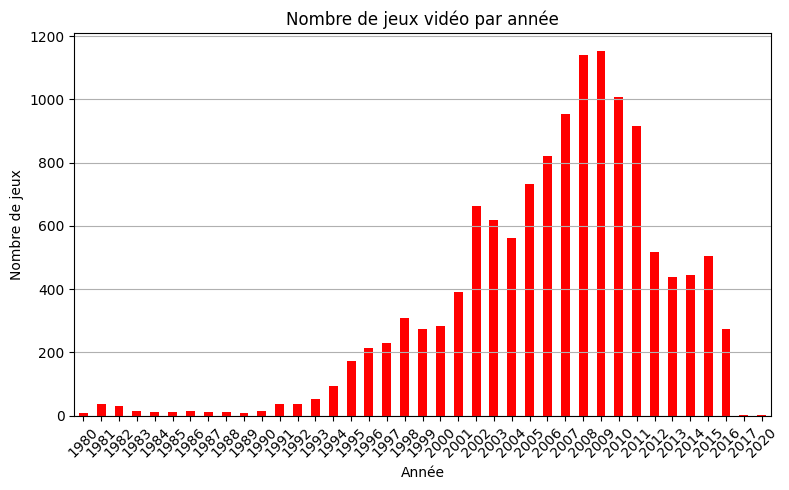

In [18]:
games_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
games_by_year.plot(kind='bar', color='Red')
plt.title('Nombre de jeux vidéo par année')
plt.xlabel('Année')
plt.ylabel('Nombre de jeux')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Preprocessing

In [45]:
categorical_cols = ['platform', 'genre', 'publisher']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

scaler = StandardScaler()
df['publisher'] = scaler.fit_transform(df[['publisher']])
df['platform'] = scaler.fit_transform(df[['platform']])
df['genre'] = scaler.fit_transform(df[['genre']])


Feature Selection

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


features = ['platform', 'year', 'genre', 'publisher']


X = df[features]
y = df['eu_sales']


model = LinearRegression()


rfe = RFE(model, n_features_to_select=3)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caractéristiques sélectionnées:", selected_features)

Caractéristiques sélectionnées: Index(['platform', 'genre', 'publisher'], dtype='object')


Training the modele

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


selected_features = ['platform', 'year', 'genre', 'publisher']

X = df[selected_features]
y = df['eu_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"MSE (Mean Squared Error): {mse}")

MSE (Mean Squared Error): 0.4468438985423866


Amelioration du modele

In [37]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [-1, 1, 2],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"MSE (Mean Squared Error) avec les meilleurs paramètres : {mse}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; t

Test prediction

In [50]:

df_test = pd.read_csv("test_data.csv")

df_test.drop('na_sales', axis=1, inplace=True)
df_test.drop('jp_sales', axis=1, inplace=True)
df_test.drop('other_sales', axis=1, inplace=True)
df_test.drop('global_sales', axis=1, inplace=True)

df_test.drop('rank', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

df_test = df_test.dropna()

db_test = df_test['year'].fillna(0).astype(int).astype(str).replace('0', '')

df_test.loc[:, 'year'] = db


categorical_cols = ['platform', 'genre', 'publisher']
encoder = LabelEncoder()
for col in categorical_cols:
    df_test[col] = encoder.fit_transform(df_test[col])

scaler2 = StandardScaler()
df_test['publisher'] = scaler2.fit_transform(df_test[['publisher']])
df_test['platform'] = scaler2.fit_transform(df_test[['platform']])
df_test['genre'] = scaler2.fit_transform(df_test[['genre']])


selected_features_test = ['platform', 'year', 'genre', 'publisher']

X_test_new = df_test[selected_features_test]


predictions_test = best_model.predict(X_test_new)



<ipython-input-50-d1d6654895ee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:, 'year'] = db
<ipython-input-50-d1d6654895ee>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = encoder.fit_transform(df_test[col])
<ipython-input-50-d1d6654895ee>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

ValueError: ignored